# **QUESTION ONE: HIV CASES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading HIV dataset
try:
    df = pd.read_csv('HIV data 2000-2023.csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'HIV data 2000-2023.csv' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000]
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000]
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000]
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,320 000 [280 000 - 370 000]
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2015,300 000 [260 000 - 350 000]


In [ ]:
df.tail()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
1547,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2020,No data
1548,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2015,No data
1549,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2010,No data
1550,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2005,No data
1551,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2000,No data


In [ ]:
# displaying the columns of the dataset.
df.columns


Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'Value'],
      dtype='object')

In [ ]:
#displaying the data types information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IndicatorCode        1552 non-null   object
 1   Indicator            1552 non-null   object
 2   ValueType            1552 non-null   object
 3   ParentLocationCode   1552 non-null   object
 4   ParentLocation       1552 non-null   object
 5   Location type        1552 non-null   object
 6   SpatialDimValueCode  1552 non-null   object
 7   Location             1552 non-null   object
 8   Period type          1552 non-null   object
 9   Period               1552 non-null   int64 
 10  Value                1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 133.5+ KB


In [ ]:
#displaying the shape of the dataframe
df.shape

(1552, 11)

In [ ]:
#replacing no data with NAN
df['Value'] = df['Value'].replace('No data', np.nan)
df['Value'].tail()

,Value
1547,NaN
1548,NaN
1549,NaN
1550,NaN
1551,NaN


In [ ]:
#Checking for missing value
df.isnull().sum()


,0
IndicatorCode,0
Indicator,0
ValueType,0
ParentLocationCode,0
ParentLocation,0
Location type,0
SpatialDimValueCode,0
Location,0
Period type,0
Period,0


In [ ]:
#Dropping the missing values
df=df.dropna()
df.isnull().sum()

,0
IndicatorCode,0
Indicator,0
ValueType,0
ParentLocationCode,0
ParentLocation,0
Location type,0
SpatialDimValueCode,0
Location,0
Period type,0
Period,0


In [ ]:
# Extract the lower bound of the range and convert to numeric
def extract_lower_bound(value):
    if isinstance(value, str):
        if '[' in value:
            try:
                return int(value.split('[')[1].split('-')[0].replace(' ', '').replace(',', ''))
            except (ValueError, IndexError):
                return np.nan
        else:
            try:
                return int(value.replace(' ', '').replace(',', ''))
            except ValueError:
                return np.nan
    elif pd.isna(value):
        return np.nan
    else:
        return value

df['Value'] = df['Value'].apply(extract_lower_bound)

# Convert 'Value' column to numeric, coercing errors to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Value'].head()

,Value
0,280000.0
1,280000.0
2,280000.0
3,280000.0
4,260000.0


In [ ]:
#checking for missing value and dropping them
df.isnull().sum()

,0
IndicatorCode,0
Indicator,0
ValueType,0
ParentLocationCode,0
ParentLocation,0
Location type,0
SpatialDimValueCode,0
Location,0
Period type,0
Period,0


In [ ]:
df=df.dropna()

In [ ]:
df['Value'].describe()

,Value
count,1.065000e+03
mean,1.941583e+05
std,6.151441e+05
min,5.000000e+02
25%,5.400000e+03
50%,2.300000e+04
75%,1.000000e+05
max,7.000000e+06


1. Visualisation that shows the trend of HIV cases in the countries that countribute to 75% global burden


In [ ]:
#Total HIV cases for each country
country_totals = df.groupby('Location')['Value'].sum().sort_values(ascending=False)

#Cumulative sum of cases
cumulative_sum = country_totals.cumsum()

#Countries contributing to 75% of the global burden
top_countries = country_totals[cumulative_sum <= cumulative_sum.max() * 0.75].index.tolist()

top_countries

['South Africa',
 'Mozambique',
 'Nigeria',
 'United Republic of Tanzania',
 'Kenya',
 'Uganda',
 'Zimbabwe',
 'Zambia',
 'Malawi',
 'Brazil',
 'Thailand',
 'Ethiopia',
 "Cote d'Ivoire",
 'Democratic Republic of the Congo']

In [ ]:
#filtering the countriest from the dataset
filtered_df = df[df['Location'].isin(top_countries)]

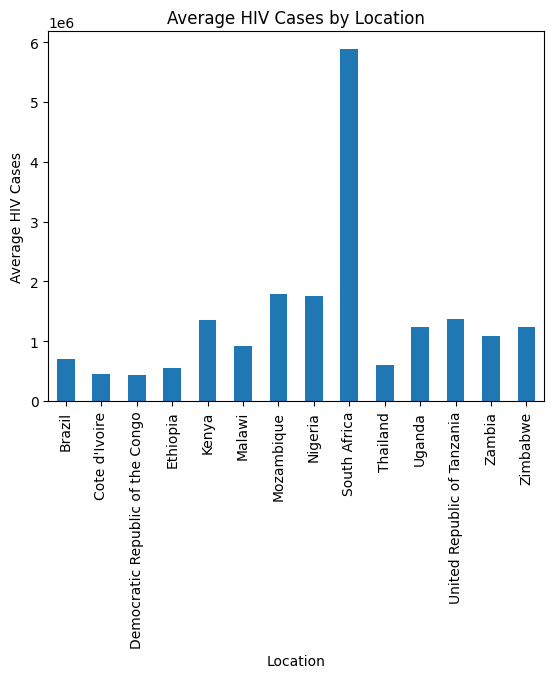

In [ ]:
#Barplot
average_hiv_by_region = filtered_df.groupby('Location')['Value'].mean()
average_hiv_by_region.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average HIV Cases')
plt.title('Average HIV Cases by Location')
plt.show()

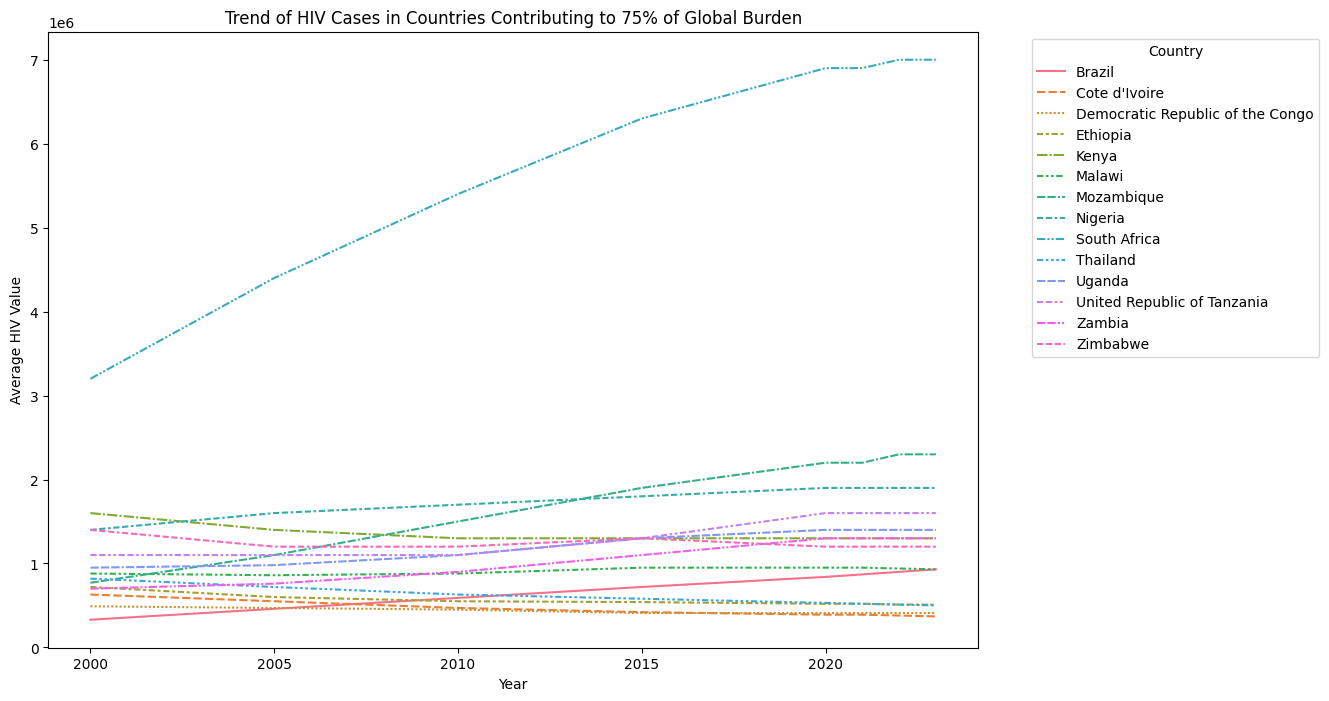

In [ ]:
#Grouping the data by country and year, and calculating the average HIV value
average_value_by_year_country = filtered_df.groupby(['Location', 'Period'])['Value'].mean().reset_index()

#a line plot to visualize trend using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_value_by_year_country, x='Period', y='Value', hue='Location',style="Location")
plt.xlabel('Year')
plt.ylabel('Average HIV Value')
plt.title('Trend of HIV Cases in Countries Contributing to 75% of Global Burden')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


2. visualization to display the trend of HIV cases in the countries contributing to 75% of the global burden within each WHO region

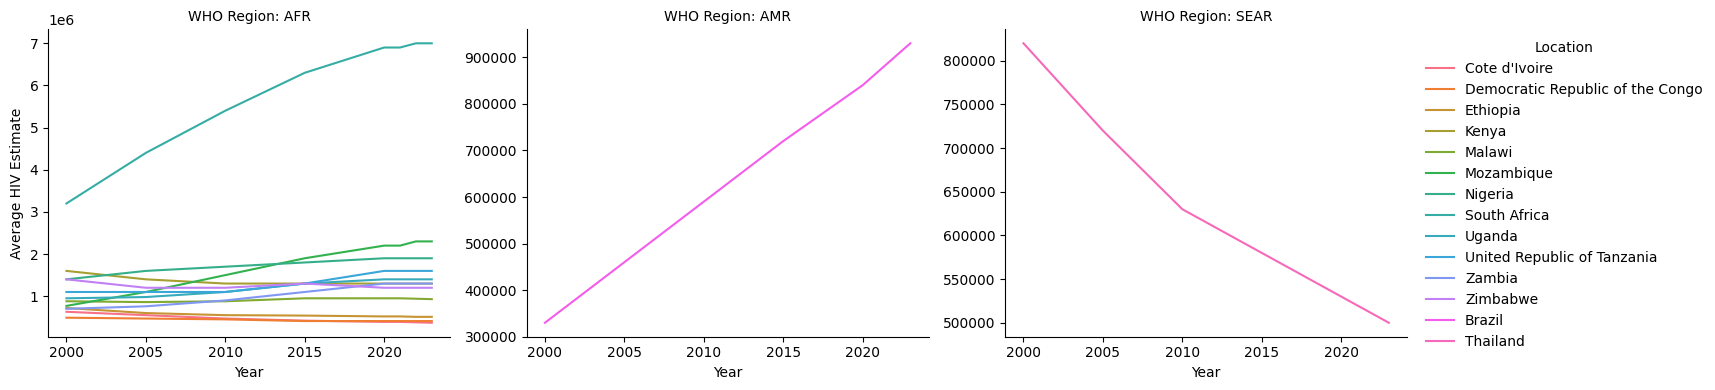

In [ ]:
# 3. Group data and calculate average HIV value
average_value_by_year_region_country = filtered_df.groupby(['ParentLocationCode', 'Location', 'Period'])['Value'].mean().reset_index()

# 4. Create the visualization (faceted line plot)
g = sns.relplot(
    data=average_value_by_year_region_country,
    x="Period", y="Value",
    hue="Location", col="ParentLocationCode",
    kind="line", col_wrap=3,  # Adjust col_wrap as needed
    height=4, aspect=1.2,  # Adjust height and aspect as needed
    facet_kws={'sharex': False, 'sharey': False}  # Allow independent scales
)

g.set_axis_labels("Year", "Average HIV Estimate")
g.set_titles("WHO Region: {col_name}")  # Set subplot titles
plt.show()

In [ ]:
#importing our multidimensional pverty dataset
df2 = pd.read_excel('multidimensional_poverty.xlsx')
df2.head()


,"Individuals in households deprived in each indicator, 110 economies, circa year 2021 (2018-2023)\nDate: October 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Deprivation rate (share of population),NaN,NaN,NaN,NaN,NaN,Multidimensional poverty headcount ratio (%)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),NaN
2,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
3,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
4,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573


In [ ]:
#importing as we skip the first 2 rows
df2 = pd.read_excel('multidimensional_poverty.xlsx', skiprows=2)
#Renaming columns for clarity
df2.columns = ['Region','Country_code', 'Economy', 'Reporting_year', 'Survey_name', 'Survey_year',
                  'Survey_coverage', 'Welfare_type', 'Survey_comparability', 'Deprivation_rate_Monetary',
                  'Deprivation_rate_Education', 'Deprivation_rate_Enrollment', 'Deprivation_rate_Electricity',
                  'Deprivation_rate_Sanitation', 'Deprivation_rate_Water', 'Multidimensional_poverty_headcount_ratio']
df2.head()

,Region,Country_code,Economy,Reporting_year,Survey_name,Survey_year,Survey_coverage,Welfare_type,Survey_comparability,Deprivation_rate_Monetary,Deprivation_rate_Education,Deprivation_rate_Enrollment,Deprivation_rate_Electricity,Deprivation_rate_Sanitation,Deprivation_rate_Water,Multidimensional_poverty_headcount_ratio
0,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
3,ECA,ARM,Armenia,2010,ILCS,2021,N,c,1,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
4,EAP,AUS,Australia,2010,SIH-LIS,2018,N,I,3,0.516880,1.71188,-,0,0,-,2.215770


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    110 non-null    object 
 1   Country_code                              110 non-null    object 
 2   Economy                                   110 non-null    object 
 3   Reporting_year                            110 non-null    int64  
 4   Survey_name                               110 non-null    object 
 5   Survey_year                               110 non-null    int64  
 6   Survey_coverage                           110 non-null    object 
 7   Welfare_type                              110 non-null    object 
 8   Survey_comparability                      110 non-null    int64  
 9   Deprivation_rate_Monetary                 110 non-null    float64
 10  Deprivation_rate_Education            

In [ ]:
df2.isnull().sum()

,0
Region,0
Country_code,0
Economy,0
Reporting_year,0
Survey_name,0
Survey_year,0
Survey_coverage,0
Welfare_type,0
Survey_comparability,0
Deprivation_rate_Monetary,0


In [ ]:
# merging the two dataset Hiv cases and multidimensional poverty
merged_df = pd.merge(df, df2, left_on=['Location', 'Period'], right_on=['Economy', 'Reporting_year'], how='inner')
merged_df.tail()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,Survey_coverage,Welfare_type,Survey_comparability,Deprivation_rate_Monetary,Deprivation_rate_Education,Deprivation_rate_Enrollment,Deprivation_rate_Electricity,Deprivation_rate_Sanitation,Deprivation_rate_Water,Multidimensional_poverty_headcount_ratio
31,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,EUR,Europe,Country,UZB,Uzbekistan,Year,2022,...,N,c,1,2.253092,0,-,0.12747,21.786885,10.693686,2.253092
32,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2010,...,N,c,2,5.008757,9.497152,6.686347,2.374333,27.518305,1.998808,6.607784
33,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,SEAR,South-East Asia,Country,NPL,Nepal,Year,2010,...,N,c,2,0.366599,13.394071,3.296023,5.949776,5.567963,2.919005,2.171141
34,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,AUS,Australia,Year,2010,...,N,I,3,0.516880,1.71188,-,0,0,-,2.215770
35,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,VNM,Viet Nam,Year,2010,...,N,c,2,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184


In [ ]:
#replacing both hyphens and zeros with NAN in all relavant columns
for column in merged_df.columns:
    if merged_df[column].astype(str).str.contains('-|0').any():
        merged_df[column] = merged_df[column].replace(['-','0'],np.nan)


<ipython-input-17-328ea8610d7d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[column] = merged_df[column].replace(['-','0'],np.nan)
<ipython-input-17-328ea8610d7d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[column] = merged_df[column].replace(['-','0'],np.nan)
<ipython-input-17-328ea8610d7d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beh

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IndicatorCode                             36 non-null     object 
 1   Indicator                                 36 non-null     object 
 2   ValueType                                 36 non-null     object 
 3   ParentLocationCode                        36 non-null     object 
 4   ParentLocation                            36 non-null     object 
 5   Location type                             36 non-null     object 
 6   SpatialDimValueCode                       36 non-null     object 
 7   Location                                  36 non-null     object 
 8   Period type                               36 non-null     object 
 9   Period                                    36 non-null     int64  
 10  Value                                   

In [ ]:
merged_df.isnull().sum()

,0
IndicatorCode,0
Indicator,0
ValueType,0
ParentLocationCode,0
ParentLocation,0
Location type,0
SpatialDimValueCode,0
Location,0
Period type,0
Period,0


In [ ]:
merged_df=merged_df.dropna()

In [ ]:
merged_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,Survey_coverage,Welfare_type,Survey_comparability,Deprivation_rate_Monetary,Deprivation_rate_Education,Deprivation_rate_Enrollment,Deprivation_rate_Electricity,Deprivation_rate_Sanitation,Deprivation_rate_Water,Multidimensional_poverty_headcount_ratio
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BEN,Benin,Year,2015,...,N,c,1,12.723279,49.023893,31.661823,34.818304,76.649594,24.109130,45.443240
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2015,...,N,c,2,9.733193,44.493997,24.717054,9.264950,59.909374,17.286547,29.177094
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,GNB,Guinea-Bissau,Year,2010,...,N,c,3,25.962856,20.071073,31.059781,27.570510,60.362864,20.897064,38.730049
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,KEN,Kenya,Year,2015,...,N,c,3,36.146057,10.055726,1.179968,24.500306,22.312516,36.060327,38.490102
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,MWI,Malawi,Year,2010,...,N,c,1,70.060599,54.329389,3.686354,88.757396,75.137657,11.400399,78.252000


In [ ]:
merged_df.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'Value', 'Region', 'Country_code', 'Economy',
       'Reporting_year', 'Survey_name', 'Survey_year', 'Survey_coverage',
       'Welfare_type', 'Survey_comparability', 'Deprivation_rate_Monetary',
       'Deprivation_rate_Education', 'Deprivation_rate_Enrollment',
       'Deprivation_rate_Electricity', 'Deprivation_rate_Sanitation',
       'Deprivation_rate_Water', 'Multidimensional_poverty_headcount_ratio'],
      dtype='object')

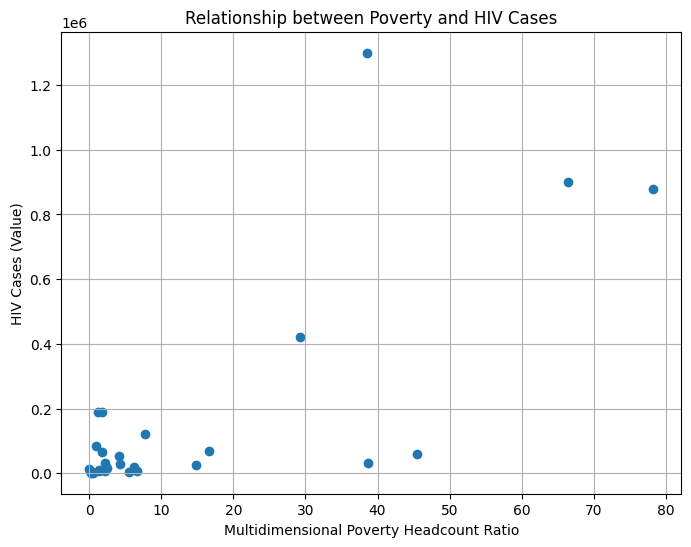

In [ ]:
#Relationship between poverty and HIV cases using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Multidimensional_poverty_headcount_ratio'], merged_df['Value'])
plt.xlabel('Multidimensional Poverty Headcount Ratio')
plt.ylabel('HIV Cases (Value)')
plt.title('Relationship between Poverty and HIV Cases')
plt.grid(True)
plt.show()


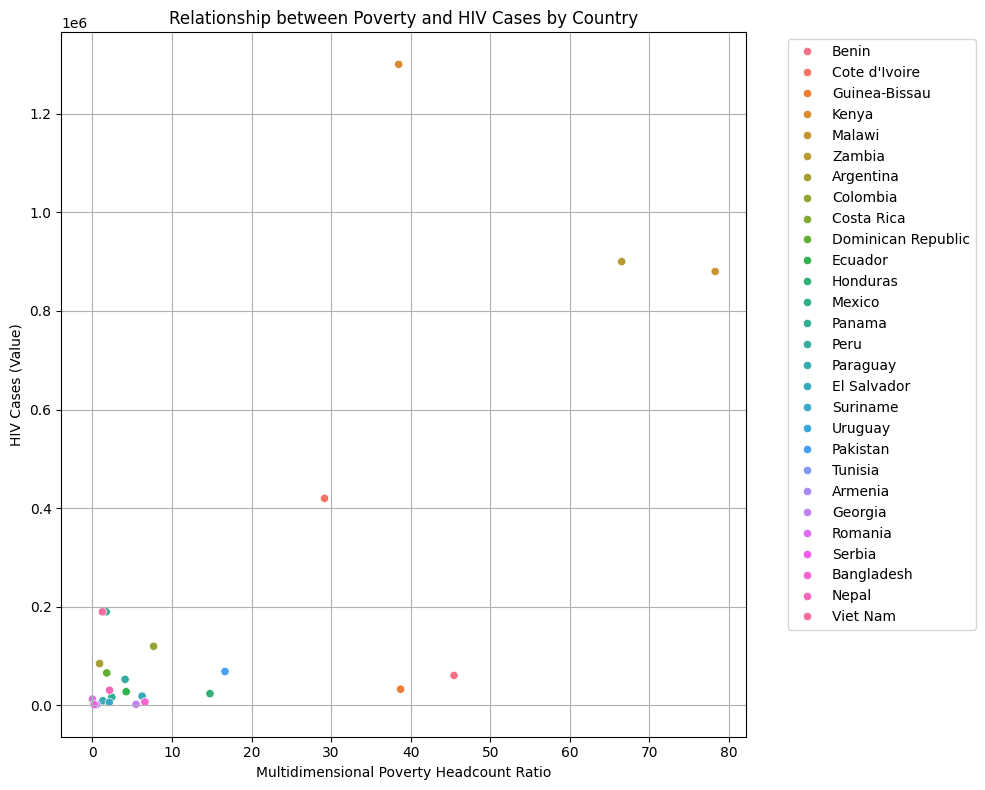

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Multidimensional_poverty_headcount_ratio', y='Value', hue='Location', data=merged_df)
plt.xlabel('Multidimensional Poverty Headcount Ratio')
plt.ylabel('HIV Cases (Value)')
plt.title('Relationship between Poverty and HIV Cases by Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


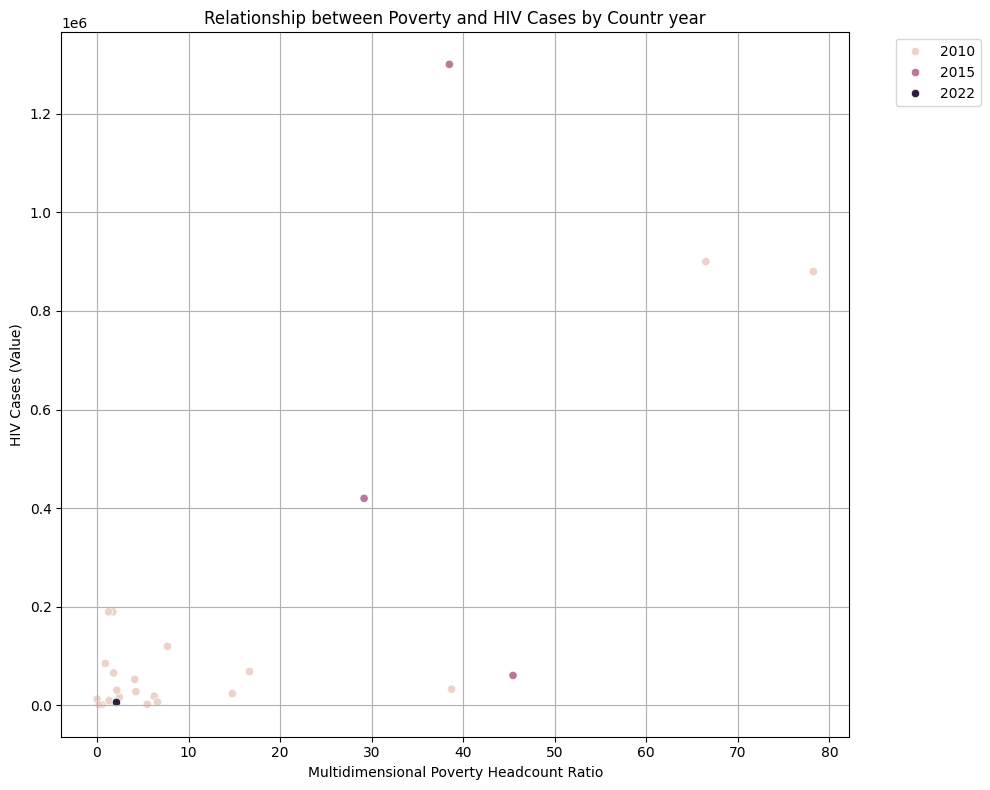

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Multidimensional_poverty_headcount_ratio', y='Value', hue='Period', data=merged_df)
plt.xlabel('Multidimensional Poverty Headcount Ratio')
plt.ylabel('HIV Cases (Value)')
plt.title('Relationship between Poverty and HIV Cases by Countr year')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

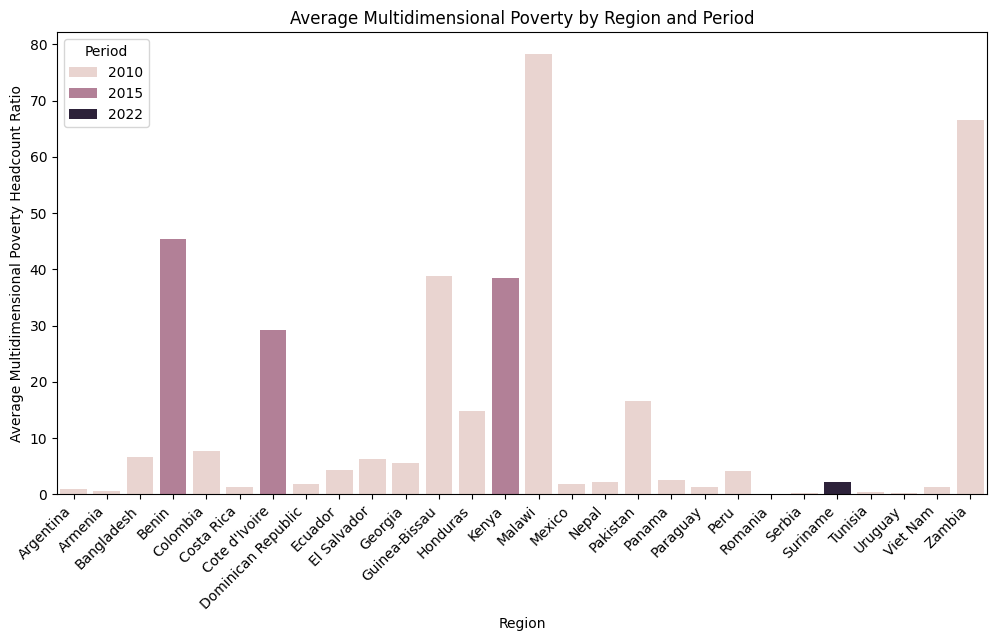

In [ ]:
#average poverty headcount ratio by Region and Period
average_poverty_by_region_period = merged_df.groupby(['Location', 'Period'])['Multidimensional_poverty_headcount_ratio'].mean().reset_index()

#clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Multidimensional_poverty_headcount_ratio', hue='Period', data=average_poverty_by_region_period)
plt.xlabel('Region')
plt.ylabel('Average Multidimensional Poverty Headcount Ratio')
plt.title('Average Multidimensional Poverty by Region and Period')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.show()

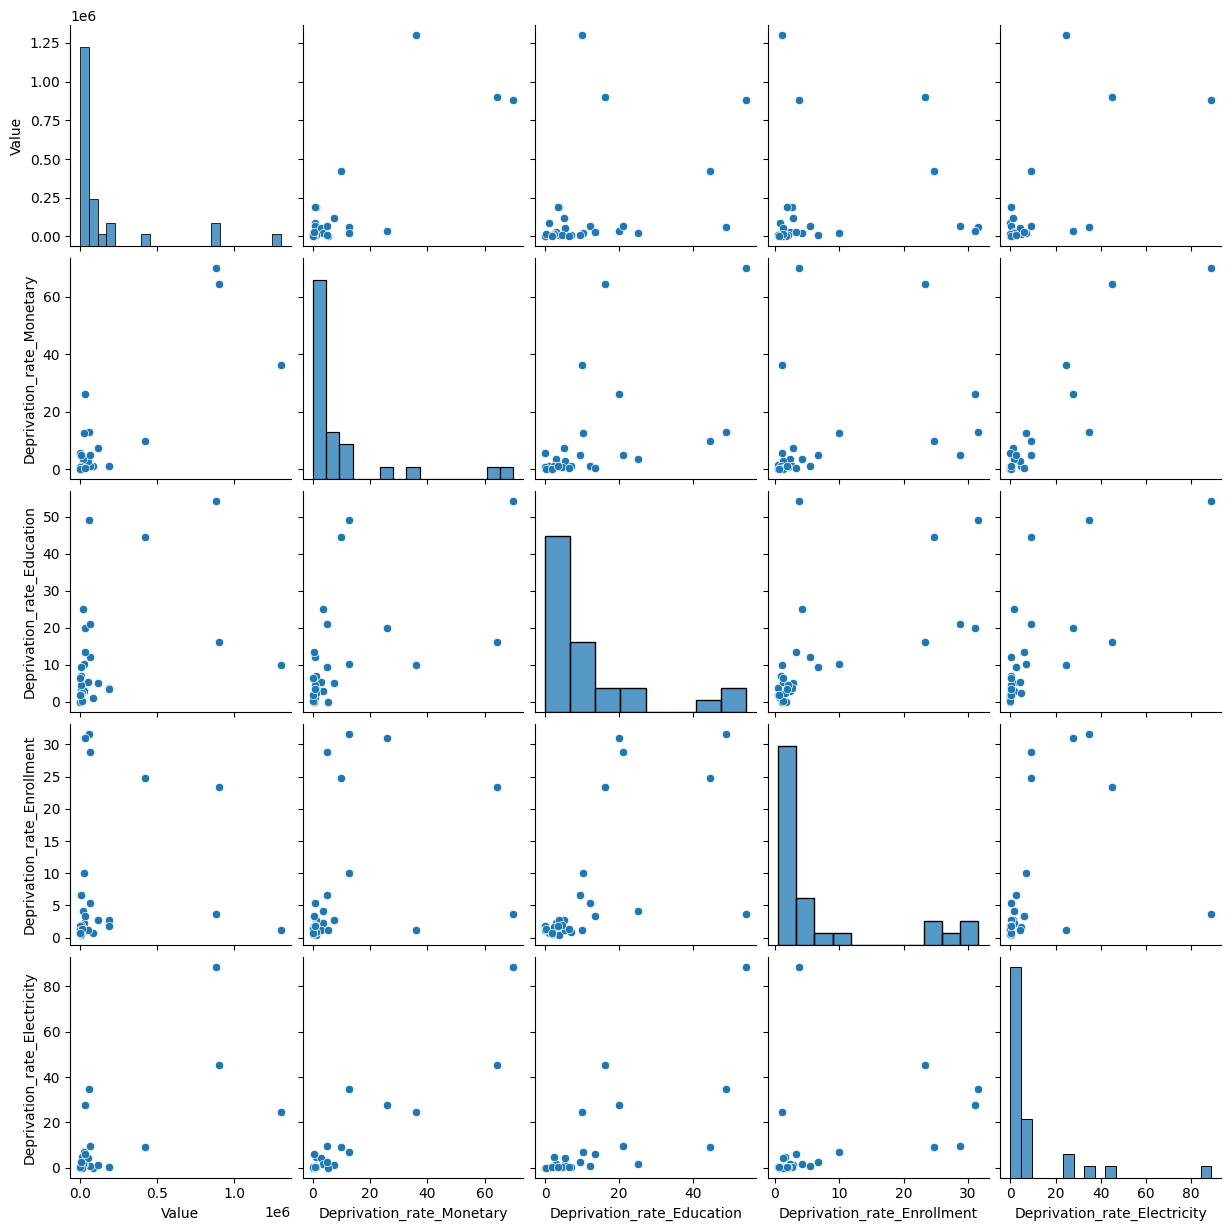

In [ ]:
#pairplot to show relationship between Hiv cases and indivial factors
sns.pairplot(merged_df[['Value', 'Deprivation_rate_Monetary',
       'Deprivation_rate_Education', 'Deprivation_rate_Enrollment',
       'Deprivation_rate_Electricity']
])
plt.show()

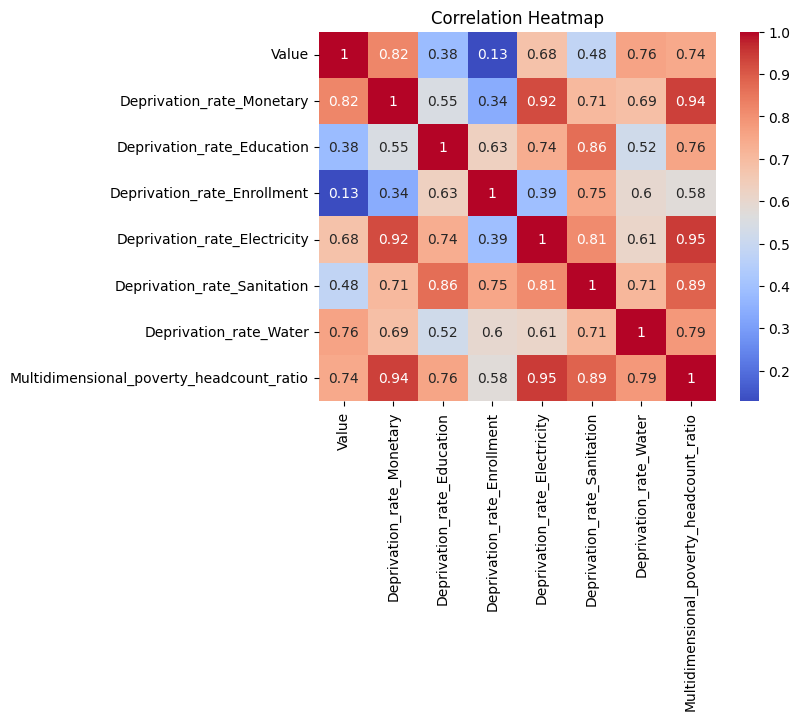

In [ ]:
#correlation matrix to show the relationship bteween variables
important_columns = ['Value', 'Deprivation_rate_Monetary',
       'Deprivation_rate_Education', 'Deprivation_rate_Enrollment',
       'Deprivation_rate_Electricity', 'Deprivation_rate_Sanitation',
       'Deprivation_rate_Water', 'Multidimensional_poverty_headcount_ratio']

correlation_matrix = merged_df[important_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **FINDINGS**

The analysis revealed that African countries account for a significant portion of the global HIV burden, with several countries contributing to 75% of global cases.
Among these, South Africa recorded the highest number of cases, making it a central focus in understanding HIV prevalence on the continent.

Over the years, HIV cases have generally shown an increasing trend across the region.
However, some countries such as the Democratic Republic of the Congo (DRC) exhibited a more steady rise, indicating relatively slower growth in prevalence.

A positive relationship between poverty levels and HIV prevalence was observed. Countries and years with higher HIV cases often coincided with higher poverty rates, suggesting that economic conditions play a significant role in disease dynamics.
However, the strength of this relationship varied depending on the country and specific year.

At the individual level, several factors were analyzed in relation to HIV prevalence. There appears to be a strong association between HIV cases and variables such as monetry,water and Electricity.
Conversely, education and enrollment rates, showed weak correlations with HIV prevalence in most contexts.



# **QUESTION TWO: Neonatal and under-five mortality rate**

In [ ]:
mortality=pd.read_csv("dataset_datascience.csv")
mortality.head()

<ipython-input-26-4d9a7e70b4ec>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mortality=pd.read_csv("dataset_datascience.csv")


,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
0,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,1995.5,47.869030,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
1,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2000.5,35.349317,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
2,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2005.5,27.699219,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
3,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2010.5,21.056003,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
4,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2015.5,20.167379,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0


In [ ]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129564 entries, 0 to 129563
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   REF_AREA                129564 non-null  object 
 1   Geographic area         129564 non-null  object 
 2   Regional group          7138 non-null    object 
 3   Indicator               129564 non-null  object 
 4   Sex                     129564 non-null  object 
 5   Wealth Quintile         129564 non-null  object 
 6   Series Name             129564 non-null  object 
 7   Series Year             129564 non-null  object 
 8   Reference Date          129564 non-null  float64
 9   Observation Value       129528 non-null  float64
 10  Lower Bound             73949 non-null   float64
 11  Upper Bound             73949 non-null   float64
 12  Standard Error          30793 non-null   float64
 13  Country notes           4710 non-null    object 
 14  Observation Status  

In [ ]:
#dropping the empty column
mortality = mortality.dropna(axis=1, how='all')

In [ ]:
print(mortality['Geographic area'].unique())

['Afghanistan' 'Angola' 'Anguilla' 'Albania' 'Andorra'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Belarus' 'Belize'
 'Bolivia (Plurinational State of)' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Côte d'Ivoire" 'Cameroon'
 'Democratic Republic of the Congo' 'Congo' 'Cook Islands' 'Colombia'
 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia' 'Germany'
 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia (Federated States of)' 'Gabon'
 'United Kingdom of Great Britain and Northern Ireland' 'Georgia' 'Ghana'
 'Guinea' 'Gambia' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Honduras' '

In [ ]:
print(mortality['Indicator'].unique())

['Neonatal mortality rate' 'Under-five mortality rate']


In [ ]:
#Data belonging eight country belonging to the East Africa Community
eac_countries = [
    "Kenya", "Uganda", "United Republic of Tanzania", "Rwanda",
    "Burundi", "South Sudan", "Democratic Republic of the Congo", "Somalia"
]

eac_data = mortality[mortality['Geographic area'].isin(eac_countries)]

In [ ]:
eac_data

,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Standard Error,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Interval
6387,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1993.5,36.413480,...,8.279168,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6388,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1998.5,41.259960,...,5.769786,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6389,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2003.5,32.839150,...,3.870619,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6390,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2008.5,28.465570,...,4.417056,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6391,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2013.5,23.706230,...,2.979608,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113635,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2019.5,45.307572,...,NaN,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113636,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2020.5,43.509117,...,NaN,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113637,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2021.5,41.786456,...,NaN,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113638,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2022.5,40.493282,...,NaN,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
#visualizing latest estimate for each indicator at the country level using shapefiles
#getting the latest year
eac_data['Series Year'] = eac_data['Series Year'].astype(str)
eac_data = eac_data[eac_data['Series Year'].str[:4].str.isnumeric()]
eac_data['Year'] = eac_data['Series Year'].str[:4].astype(int)

<ipython-input-32-0653e6b58e37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eac_data['Series Year'] = eac_data['Series Year'].astype(str)


In [ ]:
#latest values
latest = (
    eac_data.sort_values('Year')
    .groupby(['Geographic area', 'Indicator'], as_index=False)
    .last()
)

In [ ]:
latest.columns


Index(['Geographic area', 'Indicator', 'REF_AREA', 'Regional group', 'Sex',
       'Wealth Quintile', 'Series Name', 'Series Year', 'Reference Date',
       'Observation Value', 'Lower Bound', 'Upper Bound', 'Standard Error',
       'Country notes', 'Observation Status', 'Unit of measure', 'Series Type',
       'Series Category', 'Series Method', 'Age Group of Women',
       'Time Since First Birth', 'Interval', 'Year'],
      dtype='object')

In [ ]:
#Loading the shapefile
import geopandas as gpd
world = gpd.read_file("ne_110m_admin_0_countries.shp")
world.tail()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."
176,Admin-0 country,1,3,South Sudan,SDS,0,2,Sovereign country,1,South Sudan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.83385 3.50917, 29.9535 4.1737, 29..."


In [ ]:
world.columns


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [ ]:
#Filtering only the EAC countries
eac_map = world[world['ADMIN'].isin(eac_countries)]

In [ ]:
#merging indicator data with the maping
merged = eac_map.merge(latest, left_on="ADMIN", right_on="Geographic area")

In [ ]:
merged.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'Country notes', 'Observation Status', 'Unit of measure', 'Series Type',
       'Series Category', 'Series Method', 'Age Group of Women',
       'Time Since First Birth', 'Interval', 'Year'],
      dtype='object', length=192)

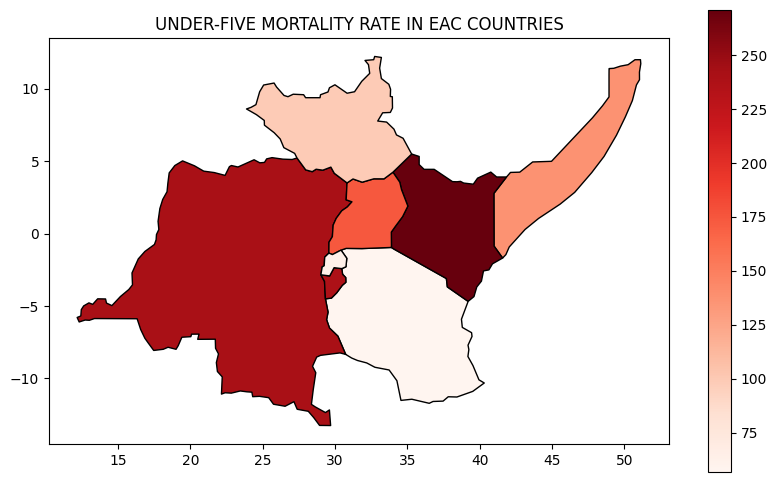

In [ ]:
#Plot for under five mortality rate indicator
under_five = "Under-five mortality rate"
subset = merged[merged['Indicator'] == under_five]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
subset.plot(column='Observation Value', cmap='Reds', legend=True, ax=ax,
            edgecolor='black')
ax.set_title("UNDER-FIVE MORTALITY RATE IN EAC COUNTRIES")
plt.show()


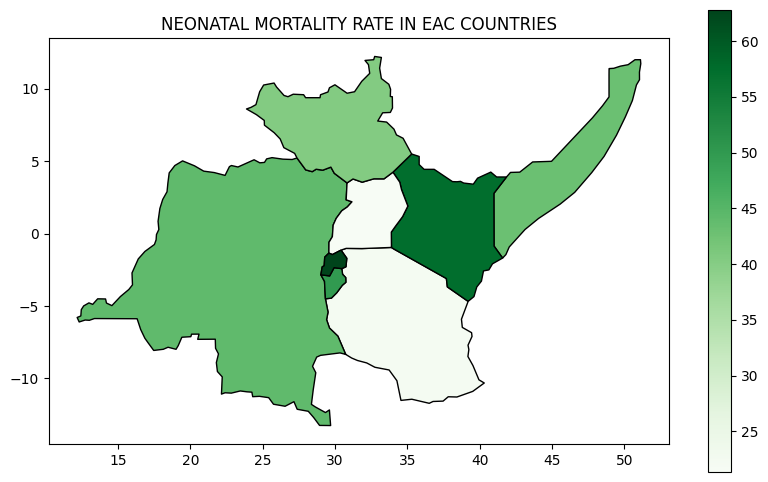

In [ ]:
# selecting indicator name
neonatal= "Neonatal mortality rate"
subset = merged[merged['Indicator'] == neonatal]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
subset.plot(column='Observation Value', cmap='Greens', legend=True, ax=ax,
            edgecolor='black')
ax.set_title("NEONATAL MORTALITY RATE IN EAC COUNTRIES")
plt.show()

In [ ]:
#Average of observation value for each year
average_trends = (
  eac_data.groupby([ 'Indicator','Year'])['Observation Value']
  .mean()
  .reset_index()
)

In [ ]:
average_trends.head()

,Indicator,Year,Observation Value
0,Neonatal mortality rate,1977,48.680000
1,Neonatal mortality rate,1983,64.428000
2,Neonatal mortality rate,1987,44.284000
3,Neonatal mortality rate,1988,51.748682
4,Neonatal mortality rate,1989,25.974526


In [ ]:
#filtering neonatal mortality rate
indicator_data = eac_data[eac_data['Indicator'] == neonatal]

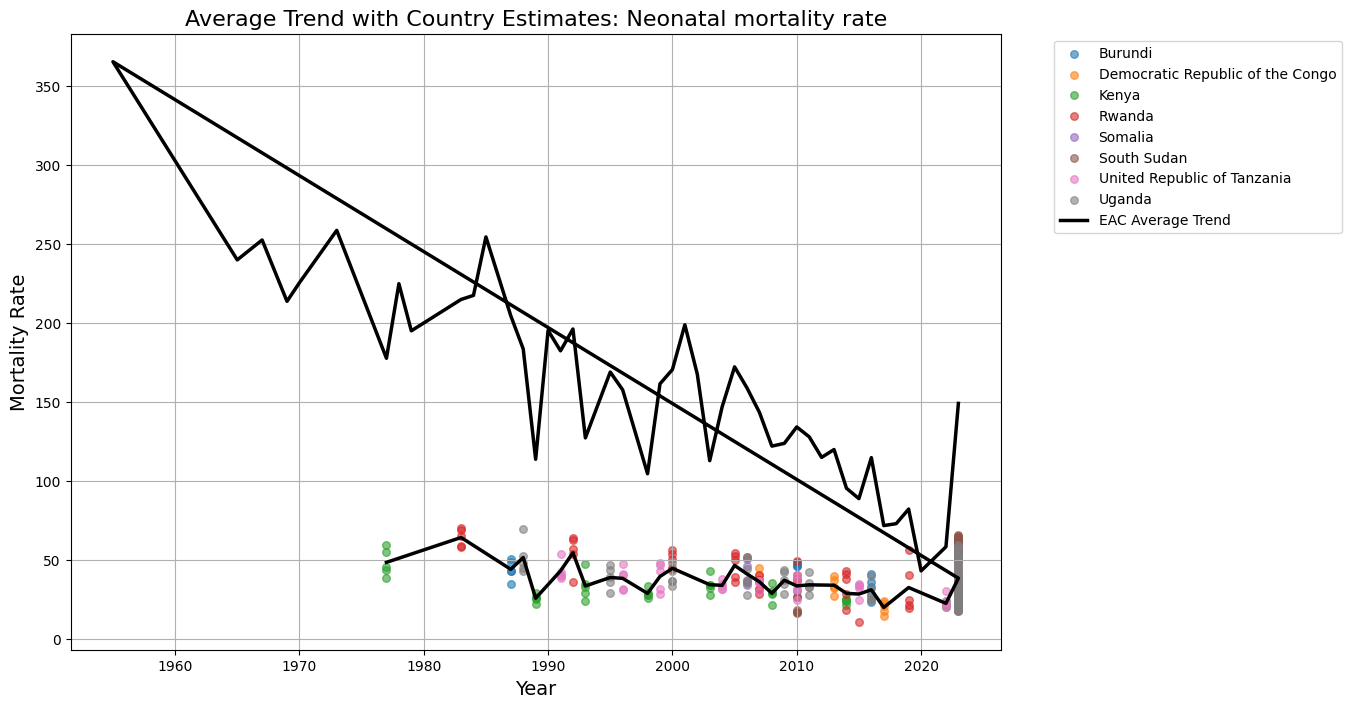

In [ ]:

#plotting
plt.figure(figsize=(12, 8))
for country in indicator_data['Geographic area'].unique():
    country_data = indicator_data[indicator_data['Geographic area'] == country]
    plt.scatter(country_data['Year'], country_data['Observation Value'], label=country, s=30, alpha=0.6)

#average trend line for neonatal mortality rate
plt.plot(average_trends['Year'], average_trends['Observation Value'], color='black', linewidth=2.5, label='EAC Average Trend')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
plt.title(f'Average Trend with Country Estimates: {neonatal}', fontsize=16)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.show()

In [ ]:
#filtering Under-five mortality indicator
data = eac_data[eac_data['Indicator'] == under_five]

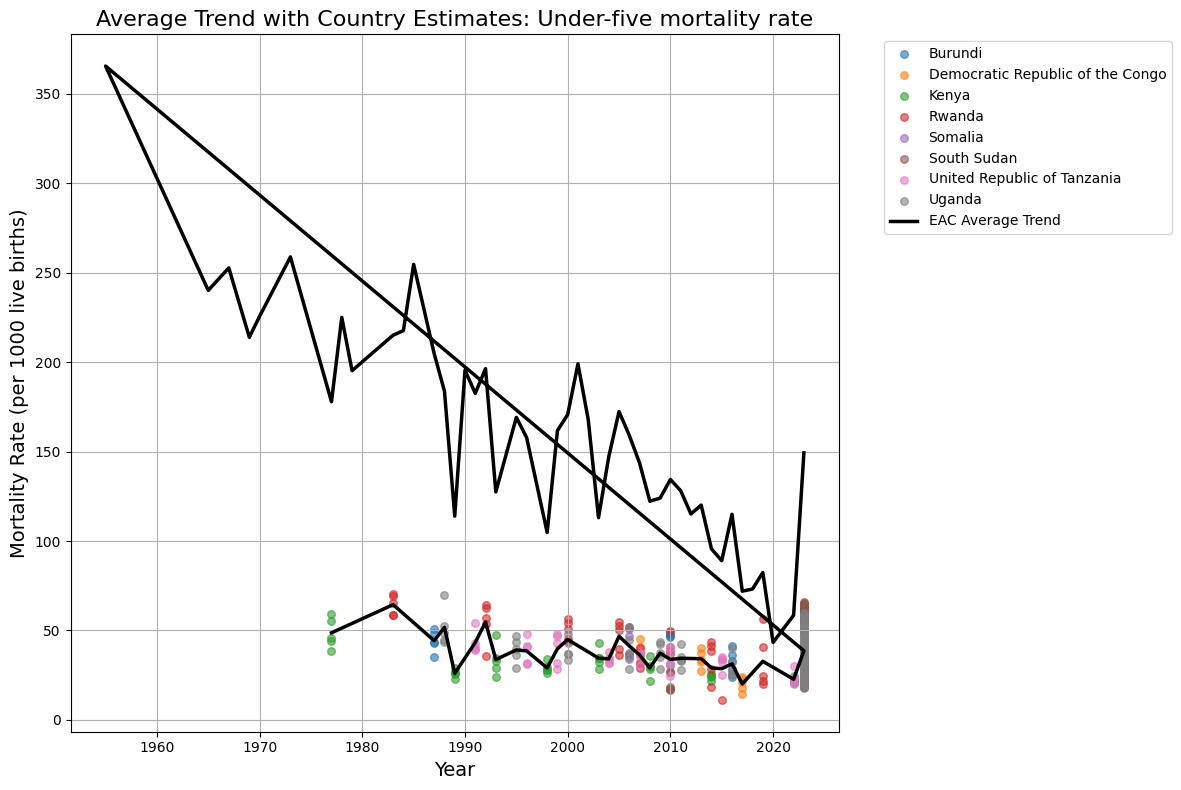

In [ ]:
plt.figure(figsize=(12, 8))
#points for each country
for country in indicator_data['Geographic area'].unique():
    country_data = indicator_data[indicator_data['Geographic area'] == country]
    plt.scatter(country_data['Year'], country_data['Observation Value'], label=country, s=30, alpha=0.6)

#the average trend line for under-five mortality rate
plt.plot(average_trends['Year'], average_trends['Observation Value'], color='black', linewidth=2.5, label='EAC Average Trend')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate (per 1000 live births)', fontsize=14)
plt.title(f'Average Trend with Country Estimates: {under_five}', fontsize=16)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


# FINDINGS
In analyzing the under-five mortality rates among the East African Community (EAC) countries, Kenya recorded the highest under-five mortality rate, followed closely by Congo and Burundi.
On the other hand, Tanzania and Rwanda exhibited the lowest under-five mortality rates within the region.

Regarding neonatal mortality rates, both Kenya and Rwanda had the highest rates, followed by Congo.
The countries with the lowest neonatal mortality rates were Uganda and Tanzania.

Overall, both under-five mortality and neonatal mortality rates have demonstrated a consistent decreasing trend over the past years across the EAC region.
This decline is evident both at the regional average level and when analyzing the trends within individual countries, reflecting significant improvements in child health outcomes.

